# Team Members

## RaviKiran Bhat

## Rubanraj Ravichandran

## Mohammad Wasil

## Ramesh Kumar

# Task: Image compression with K-means

Implement K-Means algorithm and apply it to compress an image "NAORelease.jpg" for various K (see slides for details). As a feature vector use RGB-representation of each pixel from the image. 
<br>
Analyse running time, what could you suggest to improve it? 
Compare your implementation with the existing k-mean algorithm given in python.

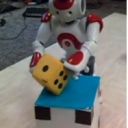

In [78]:
from IPython.display import Image
Image(filename='NAORelease.jpg')

In [66]:
import skimage
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# K-means using Library

In [67]:
def ImageCompression(K, iterations):
    
    load_image = io.imread('NAORelease.jpg')
    image_shape = load_image.shape
    rows = image_shape[0]
    cols = image_shape[1]
    load_image = load_image.reshape(image_shape[0]*image_shape[1],3)

    kmeans = KMeans(n_clusters=K, max_iter=iterations).fit(load_image)
    
    # find clusters
    clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
    labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
    labels = labels.reshape(rows,cols)
    return clusters, labels

(128, 128, 3)


In [68]:
K = 10
iterations = 30
clusters, labels = ImageCompression(K, iterations)
np.save('codebook_robot.npy', clusters)
io.imsave('compressed_robot.png',labels)

(128, 128)


In [69]:
def ImageDecompression(centers, c_image):

    image = np.zeros((c_image.shape[0],c_image.shape[1],3),dtype=np.uint8 )
    for i in range(c_image.shape[0]):
        for j in range(c_image.shape[1]):
                image[i,j,:] = centers[c_image[i,j],:]
    io.imsave('reconstructed_robot.png',image);
    io.imshow(image)
    io.show()

In [ ]:
centers = np.load('codebook_robot.npy')
c_image = io.imread('compressed_robot.png')
ImageDecompression(centers, c_image):

# K-Means using Algorithm(without Library)

In [83]:

class Cluster(object):
    def __init__(self):
        self.pixels = []
        self.centroid = None
        
    def addPoint(self, pixel):
        self.pixels.append(pixel)

    def setNewCentroid(self):
        R = [colour[0] for colour in self.pixels]
        G = [colour[1] for colour in self.pixels]
        B = [colour[2] for colour in self.pixels]

        R = sum(R) / len(R)
        G = sum(G) / len(G)
        B = sum(B) / len(B)

        self.centroid = (R, G, B)
        self.pixels = []

        return self.centroid

In [84]:
class Kmeans(object):

    def __init__(self, K, max_iterations):
        self.K = K
        self.max_iterations = max_iterations

    def run(self, image):
        self.image_size = image.size
        self.pixels = np.array(image.getdata(), dtype=np.uint8)
        self.clustered_pixels = [None] * len(image.getdata())
        self.clusters = []
        
        #pick random centroid for each K
        randomCentroids = random.sample(self.pixels, self.K)
        
        for idx in range(self.K):
            self.clusters.append(Cluster())
            self.clusters[idx].centroid = randomCentroids[idx]

        iteration = 0
        while iteration < self.max_iterations:
            for idx, pixel in enumerate(self.pixels):
                self.assignClusters(idx, pixel)
            
            for cluster in self.clusters:
                cluster.setNewCentroid()
                
            iteration += 1
        
        return

    def assignClusters(self, idx, pixel):
        shortest_distance = float('Inf')
        for cluster in self.clusters:
            curr_distance = self.calcDistance(cluster.centroid, pixel)
            if curr_distance < shortest_distance:
                shortest_distance = curr_distance
                nearest = cluster
                
        nearest.addPoint(pixel)
        self.clustered_pixels[idx] = nearest.centroid
    
    #distance is calculated by taking sum abs diff from each pixel (RGB)
    #then normalize it
    def calcDistance(self, a, b):
        result = (sum(abs(a-b)))/3.0
        return result
    
    #show clustered_pixels
    def showClusteredPixels(self):
        w, h = self.image_size
        self.clustered_pixels = np.asarray(self.clustered_pixels).astype('uint8').reshape((h, w, 3))
        colourMap = Image.fromarray(self.clustered_pixels)
        colourMap.show()

# K = 10, Max Iterations = 30

In [86]:
import random
# import Image
from PIL import Image
from datetime import datetime
start=datetime.now()
K = 10
max_iterations = 30
k_means = Kmeans(K, max_iterations)
img = Image.open("NAORelease.jpg")
k_means.run(img)
print datetime.now()-start

0:01:09.658876


In [47]:
k_means.showClusteredPixels()


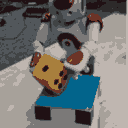

In [63]:
Image(filename='kMeans10K.png')

# K = 30, Max Iterations = 30

In [87]:
start=datetime.now()
K = 30
max_iterations = 30
k_means = Kmeans(K, max_iterations)
img = Image.open("NAORelease.jpg")
k_means.run(img)
print datetime.now()-start

0:03:16.147051


In [75]:
k_means.showClusteredPixels()


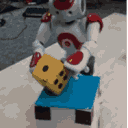

In [81]:
Image(filename='kMeans30K.png')

# K = 50, Max Iterations = 30

In [90]:
start=datetime.now()
K = 50
max_iterations = 30
k_means = Kmeans(K, max_iterations)
img = Image.open("NAORelease.jpg")
k_means.run(img)
print datetime.now()-start

0:05:21.823218


In [91]:
k_means.showClusteredPixels()


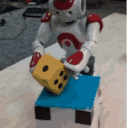

In [95]:
from IPython.display import Image
Image(filename='kMeans50K.png')